## Importing all required libraries and dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
plt.style.use(["seaborn-bright","dark_background"])

In [2]:
data = pd.read_csv("fake_or_real_news.csv")
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
data.shape

(6335, 4)

In [4]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
X = data["text"]
X.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [6]:
Y = data["label"]
Y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### Getting train and test dataset.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 101)

In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.59)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test  = tfidf_vectorizer.transform(x_test)

### Training model.

In [9]:
pac = PassiveAggressiveClassifier(max_iter=25)
pac.fit(tfidf_train,y_train)

y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy = {}".format(score))

Accuracy = 0.9400315623356128


### Classification report.

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.93      0.95      0.94       943
        REAL       0.95      0.93      0.94       958

    accuracy                           0.94      1901
   macro avg       0.94      0.94      0.94      1901
weighted avg       0.94      0.94      0.94      1901



In [11]:
cf = confusion_matrix(y_test,y_pred, labels=["FAKE","REAL"])

### Confusion matrix.

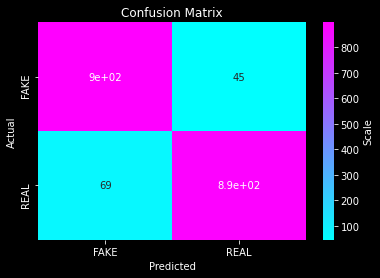

In [12]:
ax = sns.heatmap(cf, annot = True, cmap = "cool",cbar_kws={'label': 'Scale'})
ax.set_xticklabels(["FAKE","REAL"])
ax.set_yticklabels(["FAKE","REAL"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()